In [37]:
import sys
import numpy as np
import matplotlib.pyplot as plt
import pickle as pkl

from sklearn.datasets import make_regression, make_classification
from sklearn.model_selection import train_test_split

In [38]:
X, y = make_regression(n_samples=5000, n_features=200, n_informative=100, noise=0.3)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
print(f"Memory size of X: {sys.getsizeof(X)/1024: .3f} KB and y: {sys.getsizeof(y)/1024: .3f} KB")

Memory size of X:  7812.625 KB and y:  0.109 KB


In [39]:
class LinearRegressor:
    """
    A simple Linear Regressor class for regression tasks. The Linear Regressor has a single layer with linear activation.
    It has the same properties as that of a polynomial regression model.

    Attributes:
    - w: numpy array, the weights of the Linear Regressor
    - b: float, the bias of the Linear Regressor

    Methods:
    - __init__(self, input_dim): Initializes the Linear Regressor with random weights and bias
    - forward(self, X): Calculates the predicted value for the given input
    - backward(self, X, y, y_hat, lr): Calculates the gradient and updates the weights and bias
    - train(self, X_train, y_train, X_test, y_test, epochs=25, lr=0.0001): Trains the Linear Regressor
    """

    def __init__(self, no_of_features: int):
        """
        Initializes the Linear Regressor with random weights and bias.

        Parameters:
        - input_dim: int, the dimension of the input data
        """
        
        self.w = np.random.random((no_of_features))
        self.b = np.random.random()
        
    def __repr__(self):
        return f"NN(input_dim={self.w.shape[0]})"
    
    def parameters(self) -> dict:
        """
        Returns the weights and bias of the Linear Regressor.

        Returns:
        - tuple, the weights and bias
        """
        return {"weights": self.w, "bias": self.b}

    def forward(self, X: np.ndarray) -> np.ndarray:
        """
        Calculates the predicted value for the given input.

        Parameters:
        - X: numpy array, the input data

        Returns:
        - numpy array, the predicted value
        """
        
        return np.dot(X, self.w) + self.b

    def backward(self, X: np.ndarray, y: np.ndarray, y_hat: np.ndarray, lr: float) -> None:
        """
        Calculates the gradient and updates the weights and bias.

        Parameters:
        - X: numpy array, the input data
        - y: numpy array, the target values
        - y_hat: numpy array, the predicted values
        - lr: float, the learning rate

        Returns:
        - None
        """
        
        w_grad = np.dot(X.T, y_hat - y)
        b_grad = np.mean(y_hat - y)
        self.w -= lr * w_grad
        self.b -= lr * b_grad

    def train(self, X_train: np.ndarray, y_train: np.ndarray, X_test: np.ndarray, y_test: np.ndarray, epochs: int = 25, lr: float = 0.0001, log: bool = True):
        """
        Trains the Regressor.

        Parameters:
        - X_train: numpy array, the training input data
        - y_train: numpy array, the training target values
        - X_test: numpy array, the test input data
        - y_test: numpy array, the test target values
        - epochs: int, the number of training epochs (default: 25)
        - lr: float, the learning rate (default: 0.0001)
        - log: bool, whether to log the training progress (default: True)

        Returns:
        - dict, a dictionary containing the training and validation loss history
        """
        
        history = {'loss': [], 'val_loss': []}

        for epoch in range(1, epochs+1):
            y_hat = self.forward(X_train)
            self.backward(X_train, y_train, y_hat, lr)

            train_pred = self.forward(X_train)
            val_pred = self.forward(X_test)
            loss = np.sqrt(np.mean((train_pred - y_train) ** 2))
            val_loss = np.sqrt(np.mean((val_pred - y_test) ** 2))

            history['loss'].append(loss)
            history['val_loss'].append(val_loss)
            
            if log:
                print(f"Epoch {epoch}: \t train_loss: {loss: .4f} \t val_loss: {val_loss: .4f}")

        return history
    
    def predict(self, X: np.ndarray) -> np.ndarray:
        """
        Predicts the target values for the given input data.

        Parameters:
        - X: numpy array, the input data

        Returns:
        - numpy array, the predicted target values
        """
        
        try:
            return self.forward(X)
        except Exception as e:
            print(f"An error occurred: {e}")
            
    def save_model(self, path: str):
        """
        Saves the model to a file.

        Parameters:
        - path: str, the path to save the model
        
        Returns:
        - None
        """
        
        with open(path, 'wb') as file:
            pkl.dump(self, file)
            
    def load_model(self, path: str):
        """
        Loads the model from a file.

        Parameters:
        - path: str, the path to load the model from
        """
        
        with open(path, 'rb') as file:
            model = pkl.load(file)

        return model
    
    def save_weights(self, path: str):
        """
        Saves the weights and bias of the model to a file.

        Parameters:
        - path: str, the path to save the weights and bias
        
        Returns:
        - None
        """
        
        with open(path, 'wb') as file:
            pkl.dump(self.parameters(), file)
            
    def load_weights(self, path: str):
        """
        Loads the weights and bias of the model from a file.

        Parameters:
        - path: str, the path to load the weights and bias from
        
        Returns:
        - None
        """
        
        with open(path, 'rb') as file:
            weights = pkl.load(file)
            
        self.w = weights['weights']
        self.b = weights['bias']
    
    def plot_loss(self, history: dict):
        """
        Plots the training and validation loss history.

        Parameters:
        - history: dict, a dictionary containing the training and validation loss history

        Returns:
        - None
        """
        
        plt.figure(figsize=(16, 4))

        plt.subplot(1, 2, 1)
        plt.plot(history['loss'], label='train_loss', color='blue')
        plt.xlabel('Epochs')
        plt.ylabel('Loss')
        plt.title('Training')
        plt.grid(True)

        plt.subplot(1, 2, 2)
        plt.plot(history['val_loss'], label='val_loss', color='red')
        plt.xlabel('Epochs')
        plt.ylabel('Loss')
        plt.title('Validation')
        plt.grid(True)
        plt.show()

Epoch 1: 	 train_loss:  366.2928 	 val_loss:  379.0221
Epoch 2: 	 train_loss:  239.2489 	 val_loss:  254.2124
Epoch 3: 	 train_loss:  160.4653 	 val_loss:  174.3063
Epoch 4: 	 train_loss:  110.0553 	 val_loss:  121.6969
Epoch 5: 	 train_loss:  76.8794 	 val_loss:  86.2254
Epoch 6: 	 train_loss:  54.5120 	 val_loss:  61.8327
Epoch 7: 	 train_loss:  39.1254 	 val_loss:  44.7849
Epoch 8: 	 train_loss:  28.3644 	 val_loss:  32.7105
Epoch 9: 	 train_loss:  20.7356 	 val_loss:  24.0635
Epoch 10: 	 train_loss:  15.2667 	 val_loss:  17.8133
Epoch 11: 	 train_loss:  11.3098 	 val_loss:  13.2603
Epoch 12: 	 train_loss:  8.4251 	 val_loss:  9.9218
Epoch 13: 	 train_loss:  6.3092 	 val_loss:  7.4605
Epoch 14: 	 train_loss:  4.7499 	 val_loss:  5.6381
Epoch 15: 	 train_loss:  3.5973 	 val_loss:  4.2847
Epoch 16: 	 train_loss:  2.7445 	 val_loss:  3.2782
Epoch 17: 	 train_loss:  2.1145 	 val_loss:  2.5301
Epoch 18: 	 train_loss:  1.6518 	 val_loss:  1.9762
Epoch 19: 	 train_loss:  1.3157 	 val_loss:

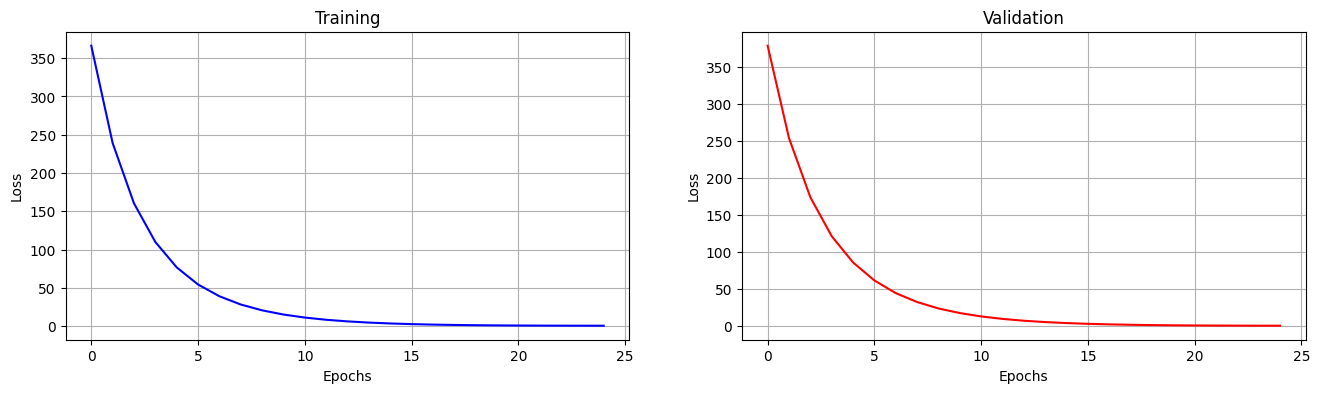

In [41]:
model =LinearRegressor(X.shape[1])
history = model.train(X_train, y_train, X_test, y_test, epochs=25, lr=0.0001, log=True)
model.plot_loss(history)

In [28]:
X, y = make_classification(n_samples=2000, n_features=500, n_informative=200,  n_classes=2)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

print(f"Memory size of X: {sys.getsizeof(X)/(1024*1024): .3f} MB and y: {sys.getsizeof(y)/(1024*1024): .3f} MB")

Memory size of X:  7.630 MB and y:  0.008 MB


Total Parameters: 32129
Size of model:  0.245 MB
Epoch 1: 	 train_loss:  0.628 	 val_loss:  0.661 	 train_accuracy:  0.556 	 val_accuracy:  0.510
Epoch 2: 	 train_loss:  0.615 	 val_loss:  0.653 	 train_accuracy:  0.581 	 val_accuracy:  0.522
Epoch 3: 	 train_loss:  0.606 	 val_loss:  0.647 	 train_accuracy:  0.591 	 val_accuracy:  0.532
Epoch 4: 	 train_loss:  0.597 	 val_loss:  0.643 	 train_accuracy:  0.608 	 val_accuracy:  0.537
Epoch 5: 	 train_loss:  0.589 	 val_loss:  0.638 	 train_accuracy:  0.618 	 val_accuracy:  0.545
Epoch 6: 	 train_loss:  0.581 	 val_loss:  0.635 	 train_accuracy:  0.629 	 val_accuracy:  0.560
Epoch 7: 	 train_loss:  0.574 	 val_loss:  0.632 	 train_accuracy:  0.638 	 val_accuracy:  0.560
Epoch 8: 	 train_loss:  0.567 	 val_loss:  0.630 	 train_accuracy:  0.649 	 val_accuracy:  0.560
Epoch 9: 	 train_loss:  0.560 	 val_loss:  0.627 	 train_accuracy:  0.659 	 val_accuracy:  0.565
Epoch 10: 	 train_loss:  0.554 	 val_loss:  0.625 	 train_accuracy:  0.669 	 v

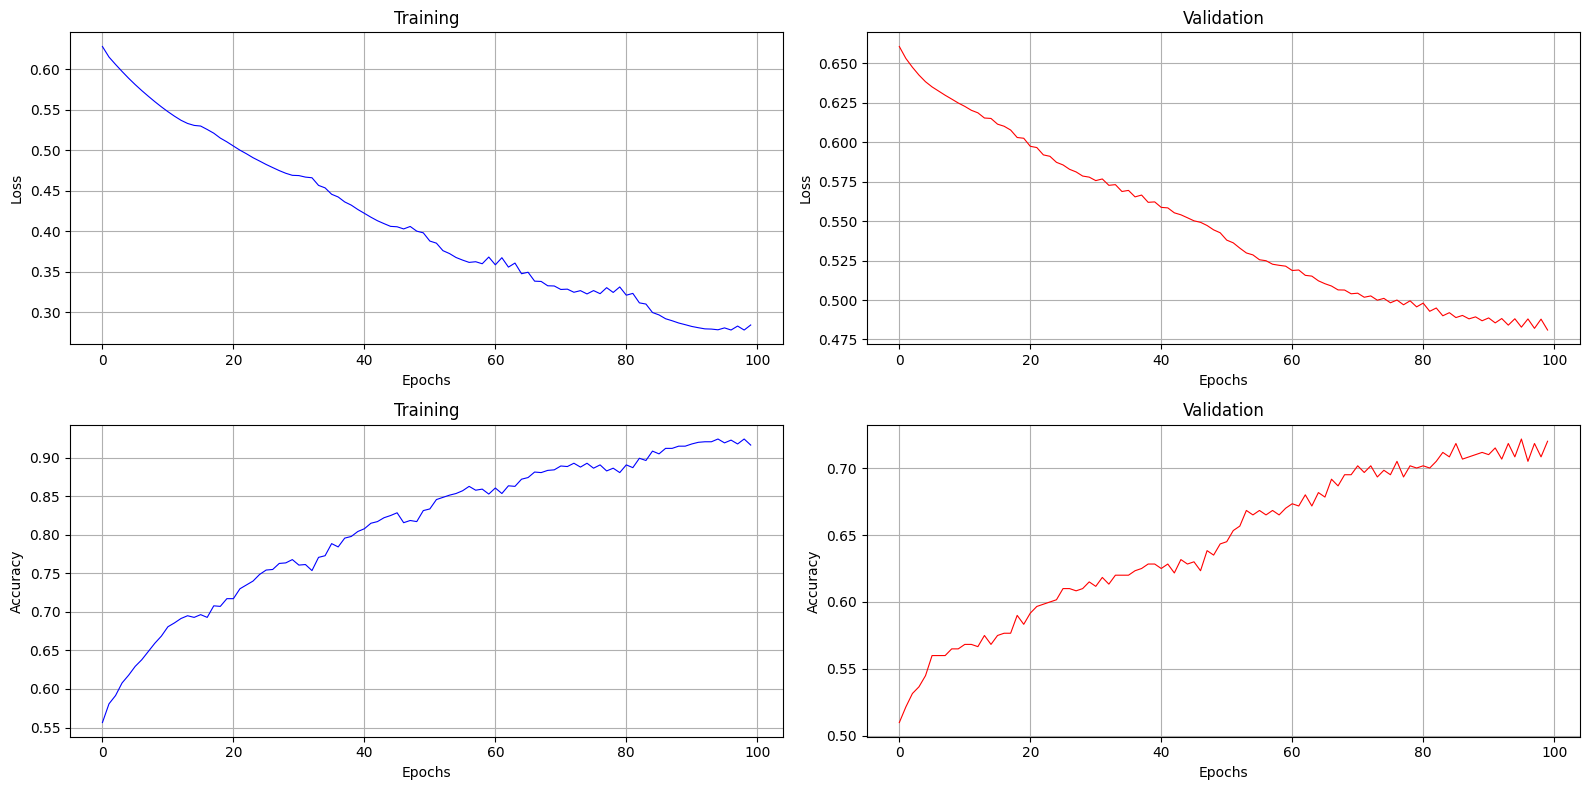

In [38]:
class Hidden_Layer_NN:
    """
    A simple neural network class for regression tasks. The neural network has multiple neurons in a single layer with linear activation.
    Supports only a single hidden layer, and the output layer has a single neuron. Classes are binary.
    
    - no_of_features (int): The number of features in the input data.
    - neurons (int): The number of neurons in the hidden layer.
    - hidden_layer_activation (str): The activation function for the hidden layer.
    - output_layer_activation (str): The activation function for the output layer.
    - w1 (ndarray): The weights of the first layer.
    - w2 (ndarray): The weights of the second layer.
    - b1 (ndarray): The bias of the first layer.
    - b2 (float): The bias of the second layer.
    
    Methods:
    - __init__(self, no_of_features, hidden_layer_activation, output_layer_activation, neurons=32): Initializes the neural network with random weights and bias.
    - rmse(self, y, y_hat): Calculates the root mean squared error (RMSE) between the predicted values and the actual values.
    - accuracy(self, y, y_hat): Calculates the accuracy of the predicted values.
    - linear(self, X): The linear activation function.
    - dlinear(self, X): The derivative of the linear activation function.
    - sigmoid(self, X): The sigmoid activation function.
    - dsigmoid(self, X): The derivative of the sigmoid activation function.
    - relu(self, X): The ReLU activation function.
    - drelu(self, X): The derivative of the ReLU activation function.
    - select_activation(self, activation): Selects the activation function based on the provided name.
    - select_derivative(self, activation): Selects the derivative of the activation function based on the provided name.
    - forward(self, X): Performs the forward pass of the neural network.
    - backward(self, X, y, y_hat, lr): Performs the backward pass of the neural network.
    - train(self, X_train, y_train, X_test, y_test, epochs=25, lr=0.0001, log=True): Trains the neural network model using the provided training data.
    - predict(self, X): Predicts the output for the given input data.
    - parameters(self): Returns the parameters of the neural network.
    - plot(self, history): Plots the training and validation loss over epochs, as well as the accuracy values.
    """
    
    def __init__(self, no_of_features: int, hidden_layer_activation: str, output_layer_activation: str, neurons: int = 32):
        self.neurons = neurons
        self.features = no_of_features
    
        self.hidden_layer_activation = hidden_layer_activation
        self.output_layer_activation = output_layer_activation
        
        self.w1 = np.random.randn(no_of_features, neurons) * np.sqrt(2. / no_of_features)
        self.w2 = np.random.randn(neurons) * np.sqrt(2. / neurons)
        self.b1 = np.zeros(neurons)
        self.b2 = 0
        
    def __repr__(self):
        return f"Hidden_Layer_NN(no_of_features={self.features}, neurons={self.neurons})"
    
    def summary(self):
        print(f"input shape: {self.features}")
        print(f"hidden layer shape: {self.neurons}")
        print(f"output shape: 1")
    
    def rmse(self, y, y_hat):
        """
        Calculates the root mean squared error (RMSE) between the predicted values (y_hat) and the actual values (y).

        Parameters:
        - y (numpy.ndarray): The actual values.
        - y_hat (numpy.ndarray): The predicted values.

        Returns:
        - float: The RMSE value.
        """
        error = np.sqrt(np.mean((y - y_hat) ** 2))
        return error
    
    def accuracy(self, y, y_hat):
        """
        Calculates the accuracy of the predicted values.

        Parameters:
        - y (numpy.ndarray): The true labels.
        - y_hat (numpy.ndarray): The predicted labels.

        Returns:
        - float: The accuracy of the predicted values.
        """
        
        y_pred = np.where(y_hat >= 0.5, 1, 0)
        accuracy  = np.mean(y == y_pred)
        return accuracy
    
    def linear(self, X):
        return X
    
    def dlinear(self, X):
        return np.ones_like(X)
    
    def sigmoid(self, X):
        return 1 / (1 + np.exp(-X))
    
    def dsigmoid(self, X):
        return self.sigmoid(X) * (1 - self.sigmoid(X))
    
    def relu(self, X):
        return np.maximum(X, 0)
    
    def drelu(self, X):
        return np.where(X > 0, 1, 0)
    
    def select_activation(self, activation: str):
        """
        Selects the activation function based on the provided name.
        
        Parameters:
        - activation (str): The name of the activation function.
        
        Returns:
        - function: The activation function.
        """
        Activators = {
            "linear": self.linear,
            "sigmoid": self.sigmoid,
            "relu": self.relu
        }
        return Activators[activation]
    
    def select_derivative(self, activation: str):
        """
        Selects the derivative of the activation function based on the provided name.
        
        Parameters:
        - activation (str): The name of the activation function.
        
        Returns:
        - function: The derivative of the activation function.
        """
        Derivatives = {
            "linear": self.dlinear,
            "sigmoid": self.dsigmoid,
            "relu": self.drelu
        }
        return Derivatives[activation]
    
    def forward(self, X):
        """
        Performs the forward pass of the neural network.

        Args:
        - X (numpy.ndarray): Input data of shape (n_samples, n_features).

        Returns:
        - numpy.ndarray: Predicted output of shape (n_samples, 1).
        """
        
        self.z1 = np.dot(X, self.w1) + self.b1
        self.a1 = self.select_activation(self.hidden_layer_activation)(self.z1)
        self.z2 = np.dot(self.a1, self.w2)
        y_hat = self.select_activation(self.output_layer_activation)(self.z2) + self.b2
        
        return y_hat
    
    def backward(self, X, y, y_hat, lr):
        """
        Performs the backward pass of the neural network.

        Args:
        - X (numpy.ndarray): Input data.
        - y (numpy.ndarray): Target labels.
        - y_hat (numpy.ndarray): Predicted labels.
        - lr (float): Learning rate.

        Returns:
        - None
        """

        loss = y_hat - y 
        w2_grad = np.dot(self.a1.T, loss * self.select_derivative(self.output_layer_activation)(self.z2))
        a1_grad = np.dot(loss.reshape(-1, 1) * self.select_derivative(self.output_layer_activation)(self.z2.reshape(-1, 1)), self.w2.reshape(-1, 1).T)
        w1_grad = np.dot(X.T, a1_grad * self.select_derivative(self.hidden_layer_activation)(self.z1))
        
        b1_grad = np.mean(a1_grad * self.select_derivative(self.hidden_layer_activation)(self.z1), axis=0)
        b2_grad = np.mean(loss * self.select_derivative(self.output_layer_activation)(self.z2))
        
        self.w2 -= lr * w2_grad
        self.w1 -= lr * w1_grad
        self.b1 -= lr * b1_grad
        self.b2 -= lr * b2_grad
        
    def train(self, X_train, y_train, X_test, y_test, epochs=25, lr=0.0001, log=True):
        """
        Trains the neural network model using the provided training data.

        Parameters:
        - X_train (numpy.ndarray): The input training data.
        - y_train (numpy.ndarray): The target training data.
        - X_test (numpy.ndarray): The input test data.
        - y_test (numpy.ndarray): The target test data.
        - epochs (int): The number of training epochs (default: 25).
        - lr (float): The learning rate for gradient descent (default: 0.0001).
        - log (bool): Whether to log the training progress (default: True).

        Returns:
        - history (dict): A dictionary containing the training history, including the loss and validation loss for each epoch.
        """
        
        print(f"Total Parameters: {self.w1.size + self.w2.size + self.b1.size + 1}")
        print(f"Size of model: {(sys.getsizeof(self.w1) + sys.getsizeof(self.w2) + sys.getsizeof(self.b1) + sys.getsizeof(self.b2))/(1024*1024): .3f} MB")
        history = {'loss': [], 'val_loss': [], 'accuracy': [], 'val_accuracy': []}

        for epoch in range(1, epochs+1):
            y_hat = self.forward(X_train)
            self.backward(X_train, y_train, y_hat, lr)
            train_pred = self.forward(X_train)
            val_pred = self.forward(X_test)

            loss = self.rmse(y_train, train_pred)
            val_loss = self.rmse(y_test, val_pred)
            accuracy = self.accuracy(y_train, train_pred)
            val_accuracy = self.accuracy(y_test, val_pred)

            history['loss'].append(loss)
            history['val_loss'].append(val_loss)
            history['accuracy'].append(accuracy)
            history['val_accuracy'].append(val_accuracy)

            if log:
                print(f"Epoch {epoch}: \t train_loss: {loss: .3f} \t val_loss: {val_loss: .3f} \t train_accuracy: {accuracy: .3f} \t val_accuracy: {val_accuracy: .3f}")

        return history
    
    def predict(self, X):
        """
        Predicts the output for the given input data.

        Parameters:
        - X (numpy.ndarray): The input data to be predicted.

        Returns:
        - numpy.ndarray: The predicted output for the input data.
        """
        try:
            return self.forward(X)
        except Exception as e:
            print(f"An error occurred: {e}")
            
    def parameters(self):
        """
        Returns the parameters of the neural network.

        Returns:
            dict: A dictionary containing the weights and bias of the neural network.
                - "weights1" (ndarray): The weights of the first layer.
                - "weights2" (ndarray): The weights of the second layer.
                - "bias" (ndarray): The bias of the neural network.
        """
        
        return {"weights": [self.w1, self.w2], "bias": [self.b1, self.b2]}
    
    def save_weights(self, path):
        """
        Saves the weights and bias of the neural network to a file.

        Parameters:
        - path (str): The path to save the weights and bias.

        Returns:
        - None
        """
        
        np.savez(path, w1=self.w1, w2=self.w2, b1=self.b1, b2=self.b2)
        
    def save_model(self, path):
        """
        Saves the model to a file.

        Parameters:
        - path (str): The path to save the model.

        Returns:
        - None
        """
        import pickle
        
        with open(path, 'wb') as f:
            pickle.dump(self, f)
            
    def load_weights(self, path):
        """
        Loads the weights and bias of the neural network from a file.

        Parameters:
        - path (str): The path to load the weights and bias.

        Returns:
        - None
        """
        
        data = np.load(path)
        self.w1 = data['w1']
        self.w2 = data['w2']
        self.b1 = data['b1']
        self.b2 = data['b2']
            
    def plot(self, history):
        """
        Plots the training and validation loss over epochs.

        Parameters:
        - history (dict): A dictionary containing the training and validation loss values, as well as the accuracy values.

        Returns:
        - None
        """

        plt.figure(figsize=(16, 8))

        plt.subplot(2, 2, 1)
        plt.plot(history['loss'], label='train_loss', color='blue', lw=0.8)
        plt.xlabel('Epochs')
        plt.ylabel('Loss')
        plt.title('Training')
        plt.grid(True)

        plt.subplot(2, 2, 2)
        plt.plot(history['val_loss'], label='val_loss', color='red', lw=0.8)
        plt.xlabel('Epochs')
        plt.ylabel('Loss')
        plt.title('Validation')
        plt.grid(True)
        
        plt.subplot(2, 2, 3)
        plt.plot(history['accuracy'], label='train_accuracy', color='blue', lw=0.8) 
        plt.xlabel('Epochs')
        plt.ylabel('Accuracy')
        plt.title('Training')
        plt.grid(True)
        
        plt.subplot(2, 2, 4)
        plt.plot(history['val_accuracy'], label='val_accuracy', color='red', lw=0.8)
        plt.xlabel('Epochs')
        plt.ylabel('Accuracy')
        plt.title('Validation')
        plt.grid(True)
        
        plt.tight_layout()
        plt.show()
        
model = Hidden_Layer_NN(no_of_features=X.shape[1], neurons=64, hidden_layer_activation="relu", output_layer_activation="sigmoid")
history = model.train(X_train, y_train, X_test, y_test, epochs=100, lr=0.0001, log=True)
model.plot(history)